In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

city  driver_count   type
0    Richardfort            38  Urban
1   Williamsstad            59  Urban
2    Port Angela            67  Urban
3     Rodneyfort            34  Urban
4    West Robert            39  Urban
5   West Anthony            70  Urban
6    West Angela            48  Urban
7  Martinezhaven            25  Urban
8      Karenberg            22  Urban
9    Barajasview            26  Urban

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

city                 date   fare        ride_id
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344
5        South Latoya  2019-03-11 12:26:48   9.52  1994999424437
6       New Paulville  2019-02-27 11:17:56  43.25   793208410091
7        Simpsonburgh  2019-04-26 00:43:24  35.98   111953927754
8     South Karenland  2019-01-08 03:28:48  35.09  7995623208694
9       North Jasmine  2019-03-09 06:26:29  42.81  5327642267789

In [5]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

Ninguna celda vacía, todas tienen valor.

In [9]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

city_type

'Rural'

In [18]:
for city_type in (city_data_df["type"].unique()):
    print(city_type)

Urban
Suburban
Rural


In [20]:
# Get the number of data points from the Urban cities.
# Si lo ponemos así se visualiza unicamente una lista de verdadero y falso
city_data_df["type"]=="Urban"

0       True
1       True
2       True
3       True
4       True
       ...  
115    False
116    False
117    False
118    False
119    False
Name: type, Length: 120, dtype: bool

In [ ]:
# Ya luego hacemos la suma y así lo pone

In [23]:
sum(city_data_df["type"]=="Urban")

66

In [24]:
sum(city_data_df["type"]=="Suburban")


36

In [25]:
sum(city_data_df["type"]=="Rural")

18

# Merge data frames

In [28]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Cambio denombre de la columna
pyber_data_df.rename(columns = {'driver_count':'city_driver_count'}, inplace=True)
pyber_data_df.rename(columns = {'type':'city_type'}, inplace=True)

# Display the DataFrame
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   city_driver_count city_type  
0                  5     Urban  
1                 72     Urban  
2                 57     Urban  
3                 34     Urban  
4                 46     Urban

Se va a separar el data frame principal en varios para hacer el análisis de manera individual.

In [30]:
# Create the Urban city DataFrame.
# Se separan los Data frames por tipo de ciudad, para sacar los valores independientes.
# 1. Nombre del nuevo df
# 2. Data frame original
# 3. Luego la condicion que queremos que se cumpla

urban_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Rural"]
rural_cities_df.head()

city                 date   fare        ride_id  \
2250   Randallchester  2019-04-13 11:13:31  43.22  1076079536213   
2251      North Holly  2019-02-02 14:54:00  12.42  1985256326182   
2252      Michaelberg  2019-03-27 18:27:34  54.85  4421836952718   
2253  Lake Latoyabury  2019-02-23 21:12:24  47.90  3269652929887   
2254  Lake Latoyabury  2019-05-06 08:57:56  51.80  4018025271936   

      city_driver_count city_type  
2250                  9     Rural  
2251                  8     Rural  
2252                  6     Rural  
2253                  2     Rural  
2254                  2     Rural

# Conteo de viajes por tipo de ciudad y luego ciudad

· urban_ride_count

· suburban_ride_count

· rural_ride_count


In [31]:
# Get the number of rides for urban cities. Esto crea una Serie

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Tarifa promedio por ciudad en tipo "urbana"

In [33]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [62]:
urban_avg_fare_df = pd.DataFrame(urban_avg_fare)

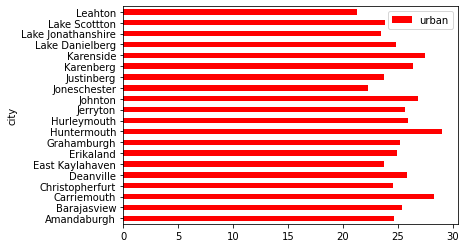

In [77]:
#Aquí estamos graficando las primeras 5 ciudades

urban_avg_fare.head(20).plot.barh(color='red', label= 'urban')
plt.legend()
plt.show()

In [78]:
# Ordena los valores de menor a mayor.
urban_avg_fare_df['fare'].sort_values(ascending=False)

city
Huntermouth            28.993750
Rodneyfort             28.616957
South Phillip          28.571290
Carriemouth            28.314444
West Patrickchester    28.233125
                         ...    
Raymondhaven           21.480400
Leahton                21.243810
Royland                20.570667
West Gabriel           20.346087
South Latoya           20.093158
Name: fare, Length: 66, dtype: float64

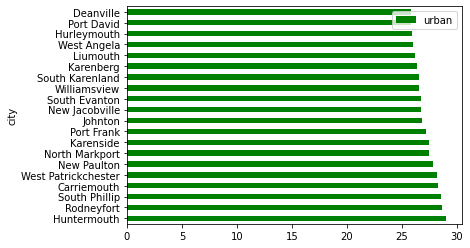

In [81]:
u_sorted = urban_avg_fare_df['fare'].sort_values(ascending=False)
u_sorted.head(20).plot.barh(color='green', label= 'urban')
plt.legend()
plt.show()

In [84]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["city_driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: city_driver_count, dtype: float64

In [86]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["city_driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["city_driver_count"]

In [91]:
pyber_data_df.to_excel('pyber_data_df.xlsx')

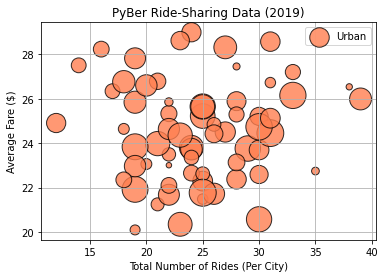

In [96]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

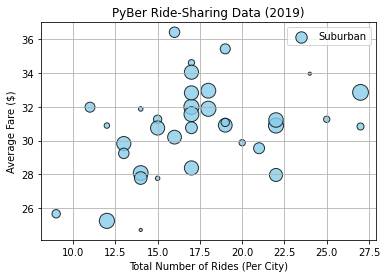

In [99]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

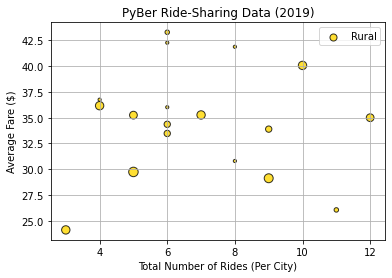

In [100]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

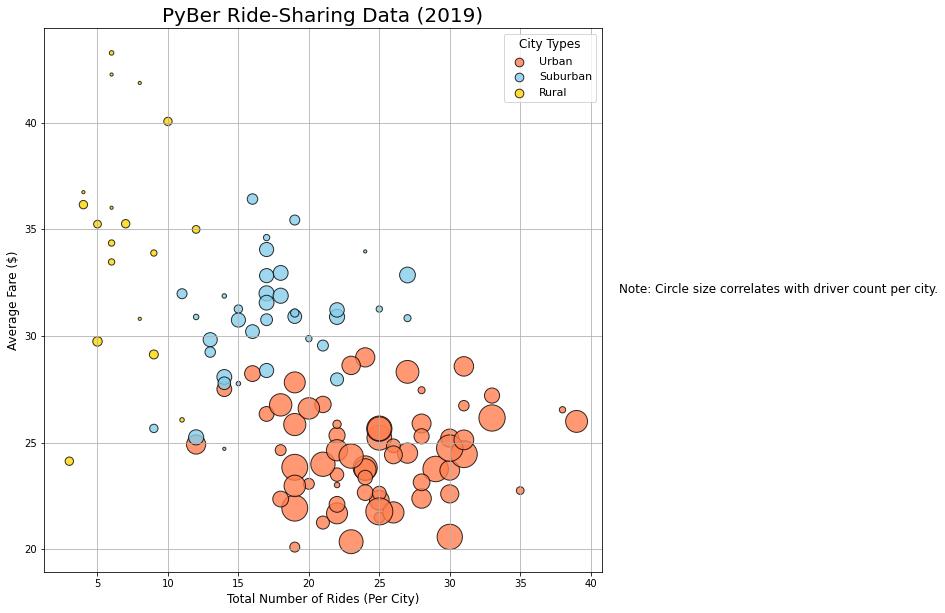

In [113]:
# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Grafica la urban
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Grafica la suburban
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

# Grafica la rural
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="11", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 32, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()